# Logistic Regression - Binary Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About the data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's likelihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features
    - age - Age of participant in years;
    - physical_score - Score achieved during physical exam.

* Label/Target
    - test_result - 0 if no pass, 1 if test passed.

In [3]:
df = pd.read_csv('hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


## Exploratory Data Analysis

Let's take a look in the statistical information about the data.

In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


Let's get the value count of the test result.

In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

Text(0.5, 0, 'Test Result')

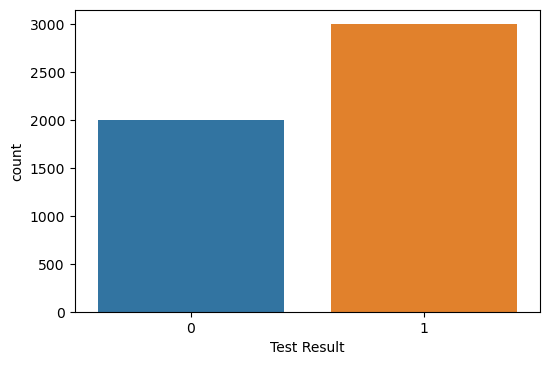

In [8]:
plt.figure(dpi=100)
sns.countplot(data=df, x='test_result')
plt.xlabel('Test Result')

### Distribution of the features per category

- Is there a relationship between ages and test results?          
It seems that people who does not pass the test tends to be older. 

Text(0, 0.5, 'Age')

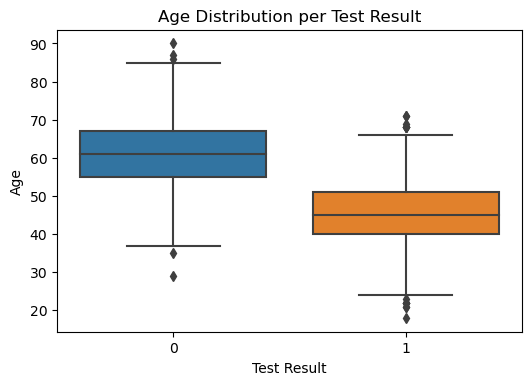

In [9]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result', y='age')
plt.title('Age Distribution per Test Result')
plt.xlabel('Test Result')
plt.ylabel('Age')

- Is there a relationship between physical score and test results?          
It seems that people who pass the test tends to have a higher physical score. 

Text(0, 0.5, 'Physical Score')

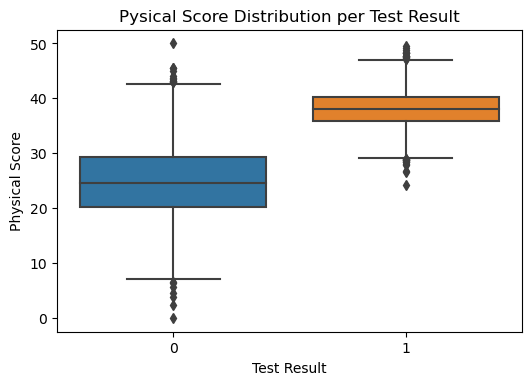

In [10]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result', y='physical_score')
plt.title('Pysical Score Distribution per Test Result')
plt.xlabel('Test Result')
plt.ylabel('Physical Score')

- Is there a relatonship between physical score and age? And how they are related with the test result?

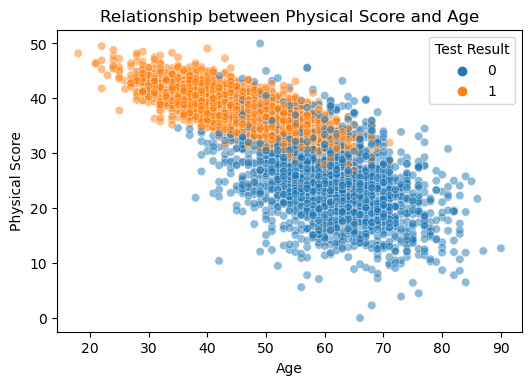

In [11]:
plt.figure(dpi=100)
sns.scatterplot(data=df, x='age', y='physical_score', 
                hue='test_result', alpha=0.5)
plt.title('Relationship between Physical Score and Age')
plt.xlabel('Age')
plt.ylabel('Physical Score')
plt.legend(title='Test Result')

With the scatterplot above we can see the following:       
   - Older people tends to have a lower physical score and young people tends to have a higher physical score.      
   - It seems that someone who is younger and have a good physical condition is more likely to pass the hearing test.       

Let's see the distribution of the data in a pairplot.

<Figure size 600x400 with 0 Axes>

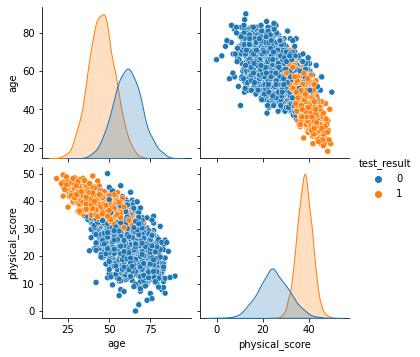

In [12]:
plt.figure(dpi=100)
sns.pairplot(data=df, hue='test_result')

### Correlation
- What is the correlation between the features?

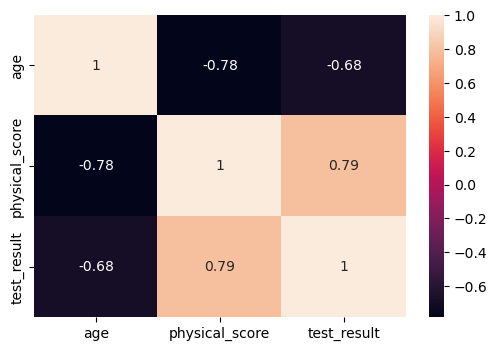

In [13]:
plt.figure(dpi=100)
sns.heatmap(data=df.corr(), annot=True)

- There is a high positive correlation between the test result and physical score, which means that higher the physical score higher is the chance of pass the test.
- There is a high negative correlation between the age and physical score, which means that as the age increases the physical score decreases.

## Model Training

Creating X and y

In [14]:
X = df.drop('test_result', axis=1)

In [15]:
y = df['test_result']

Train/Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=101)

Scale data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

Create the model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

Training the model

In [25]:
log_model.fit(X_train, y_train)

LogisticRegression()